# Capital Asset Pricing Model (CAPM) #

Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013. Assume that the (net) risk-free rate is 0.13% per month.

**Market Model**

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

* Create a table showing the intercept and slope coefficients for the ten industry portfolios.
* Briefly explain the economic significance of the intercept and slope coefficients.

**Security Market Line (SML)**

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

* Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.
* Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)
* Briefly explain the economic significance of the SML.

Economic significance:

* Intercept coefficient from market model regression shows pricing error relative to CAPM.
* Slope coefficient from market model regression shows degree of exposure to market risk.
* SML shows that all appropriately-priced assets have same Treynor ratio ⇒ assets that lie above SML are underpriced, while assets that lie below SML are overpriced.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option("display.precision", 8)

In [2]:
# we assume risk free rate remains stable at 0.13
R_f = 0.13

In [3]:
# load data
industry_portfolio_df = pd.read_excel("Industry_Portfolios.xlsx")
industry_portfolio_df = industry_portfolio_df.drop(["Date"], axis=1)
market_portfolio_df = pd.read_excel("Market_Portfolio.xlsx")
market_portfolio_df = market_portfolio_df.drop(["Date"], axis=1)
concated_df = pd.concat([industry_portfolio_df, market_portfolio_df], axis=1)
concated_df_mean = concated_df.mean().to_numpy()
# excess return wrt risk free return
concated_excess_df = concated_df - R_f
concated_excess_df.head()

c:\Users\kilohp\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\kilohp\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
0,-0.07,-1.20,-0.75,0.31,4.40,1.28,0.32,2.96,1.79,2.75,2.09
1,4.12,-0.20,1.82,4.56,-3.05,-0.65,5.96,0.76,1.94,2.03,1.33
2,-0.22,-1.28,-0.40,-0.26,-2.68,-2.20,0.16,-4.09,1.00,-0.76,-1.36
3,1.29,2.17,-0.30,2.39,-5.04,-0.61,-2.83,3.41,-3.68,-3.89,-1.88
4,-2.02,-1.77,1.48,0.26,4.72,-3.08,0.17,-0.55,1.15,1.73,1.10


In [ ]:
concated_df.head()

In [1]:
concated_df_mean

NameError: name 'concated_df' is not defined

In [5]:
# regression for market model
market_model_result = []
for n, portfolio in enumerate(concated_excess_df.columns):
    y = concated_excess_df[portfolio].to_numpy()  # Ri - Rf
    x = concated_excess_df["Market"].to_numpy()  # Rm - Rf
    my_polyfit = np.polyfit(x, y, 1)
    slope = my_polyfit[0]  # beta
    y_intercept = my_polyfit[1]  # error term
    market_model_result.append([y_intercept, slope])
market_model_result = np.array(market_model_result)

market_model_result

array([[ 3.69442880e-01,  6.52647356e-01],
       [-4.15599076e-01,  1.64853565e+00],
       [ 1.59770835e-01,  1.16984630e+00],
       [ 5.01718573e-01,  9.69849956e-01],
       [-6.40195275e-02,  1.13296944e+00],
       [ 1.94690929e-01,  9.00729251e-01],
       [ 2.75492155e-01,  8.26492402e-01],
       [ 2.37841187e-01,  6.73035696e-01],
       [ 4.44584616e-01,  5.38086100e-01],
       [-3.87134521e-01,  1.20730946e+00],
       [-2.00783714e-16,  1.00000000e+00]])

In [6]:
# regression result output
regression_result_df = pd.DataFrame(
    [concated_excess_df.columns, market_model_result[:, 0], market_model_result[:, 1]]
).T.rename(columns={0: "portfolio name", 1: "y intercept", 2: "slope"})
regression_result_df

,portfolio name,y intercept,slope
0,NoDur,0.36944288,0.65264736
1,Durbl,-0.41559908,1.64853565
2,Manuf,0.15977083,1.1698463
3,Enrgy,0.50171857,0.96984996
4,HiTec,-0.06401953,1.13296944
5,Telcm,0.19469093,0.90072925
6,Shops,0.27549215,0.8264924
7,Hlth,0.23784119,0.6730357
8,Utils,0.44458462,0.5380861
9,Other,-0.38713452,1.20730946


## SECURITY MARKET LINE ! ##

In [7]:
sml_data_df = pd.DataFrame(
    [concated_excess_df.columns, regression_result_df["slope"], concated_df.mean()]
).T.rename(
    columns={
        0: "portfolio name",
        1: "estimated beta from regression",
        2: "portfolio mean",
    }
)
sml_data_df

,portfolio name,estimated beta from regression,portfolio mean
0,NoDur,0.65264736,0.90283333
1,Durbl,1.64853565,0.73333333
2,Manuf,1.1698463,1.01283333
3,Enrgy,0.96984996,1.23116667
4,HiTec,1.13296944,0.76625
5,Telcm,0.90072925,0.88141667
6,Shops,0.8264924,0.91633333
7,Hlth,0.6730357,0.78383333
8,Utils,0.5380861,0.90716667
9,Other,1.20730946,0.48908333


In [8]:
# regression for SML
sml_x = list(sml_data_df["estimated beta from regression"].to_numpy())
sml_y = list(sml_data_df["portfolio mean"].to_numpy())
sml_result = np.polyfit(sml_x, sml_y, 1)
sml_slope = sml_result[0]
sml_intercept = sml_result[1]
# print(sml_x)
# print(sml_x[0:-1])

In [9]:
print(f"sml intercept = {sml_intercept}")
print(f"sml slope = {sml_slope}")

sml intercept = 1.0327683682657056
sml slope = -0.18546745836573247


In [10]:
# create y points for SML graph plotting
possible_beta = np.arange(0, 2.01, 0.01)
sml_return = []
for x in possible_beta:
    y = sml_intercept + sml_slope * x
    sml_return.append(y)

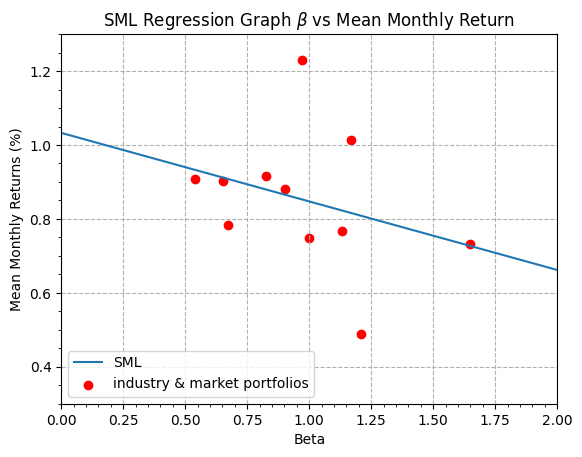

In [11]:
f1, ax1 = plt.subplots(1)
# ax1.set(xlim=(0,2), ylim=(0,1.5), aspect='equal')
ax1.plot(possible_beta, sml_return, label="SML")
ax1.xaxis.set_major_locator(plt.MultipleLocator(0.25))
ax1.yaxis.set_major_locator(plt.MultipleLocator(0.10))
ax1.set(xlim=(0, 2), ylim=(0.3, 1.3))
ax1.set_xlabel("Beta")
ax1.set_ylabel("Mean Monthly Returns (%)")
ax1.set_title(r"SML Regression Graph ${\beta}$ vs Mean Monthly Return")
ax1.xaxis.set_major_locator(ticker.AutoLocator())
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_major_locator(ticker.AutoLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
# for port_x,port_y,label in list(zip(,,sml_label)) :
ax1.scatter(sml_x, sml_y, label="industry & market portfolios", color="red")
ax1.legend(loc="lower left")
ax1.grid(linestyle="dashed")

plt.show(f1)
f1.savefig("sml.jpg")

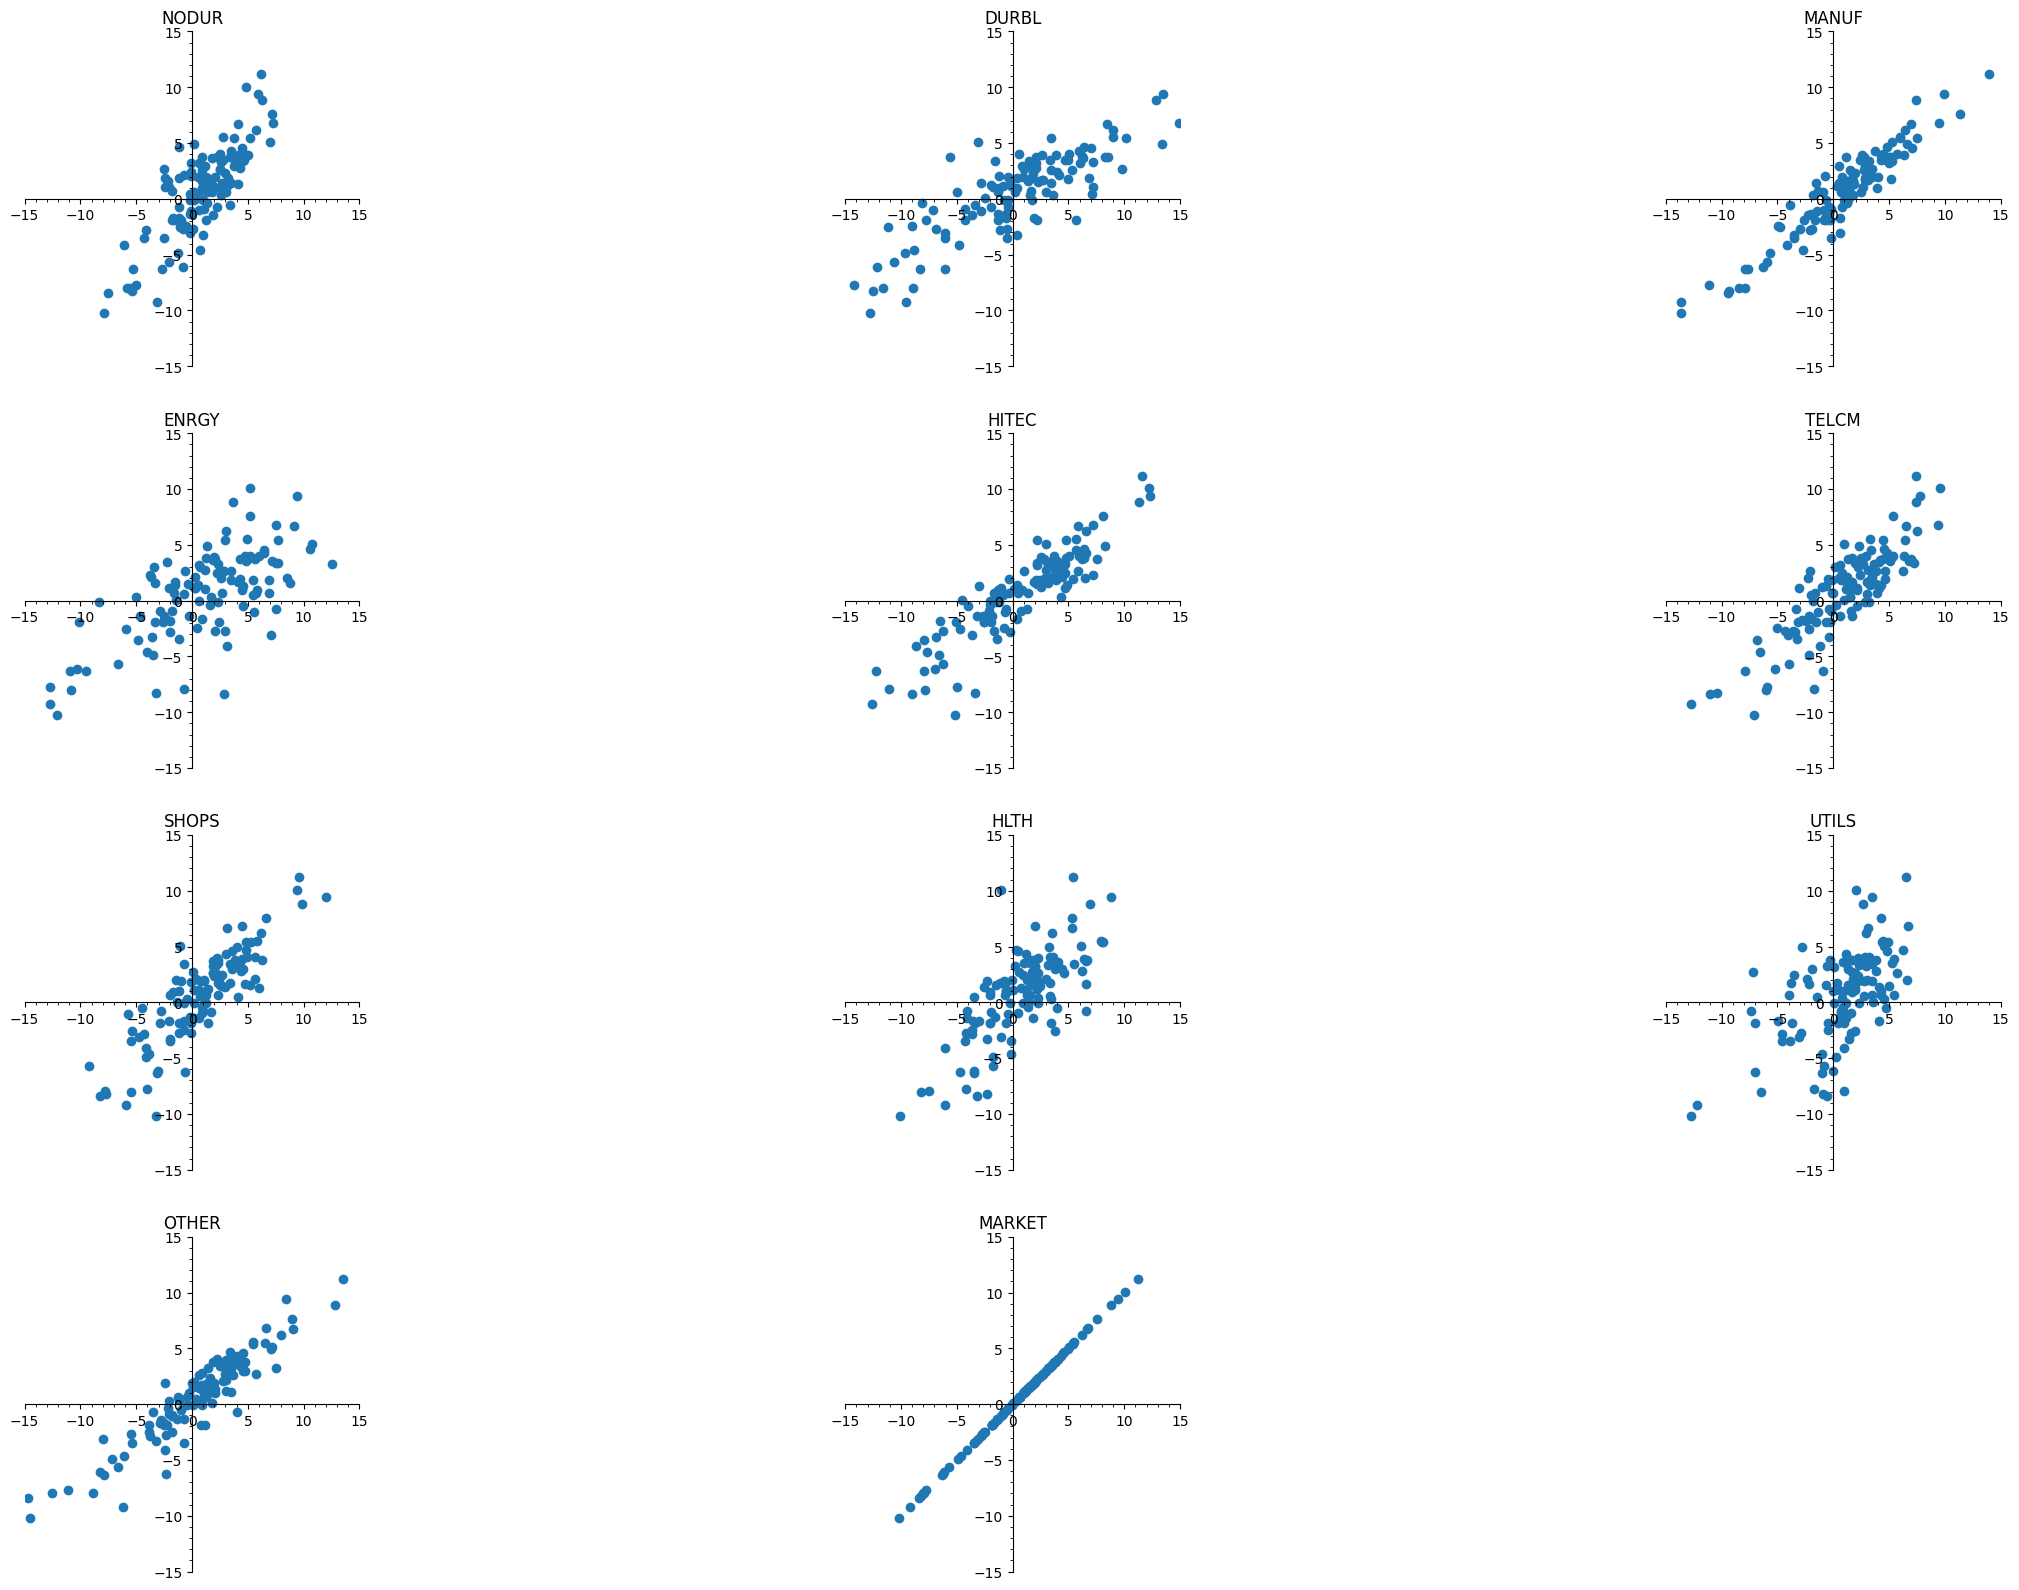

In [12]:
# fun experiment, lets do multiple subplots !
plt.figure(figsize=(30, 20))
for n, portfolio in enumerate(concated_excess_df.columns):
    # add new subplots
    ax = plt.subplot(4, 3, n + 1)
    ax.scatter(concated_excess_df[portfolio], concated_excess_df["Market"])
    # chart formatting
    ax.set_title(portfolio.upper())
    ax.set_xlabel("")
    # ax.set_xlim(xmin=0)
    # ax.set_ylim(ymin=0)
    ax.set(xlim=(-15, 15), ylim=(-15, 15), aspect="equal")
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)